In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set_style('whitegrid')

In [5]:
import pandas_datareader.data as pdr

In [6]:
from datetime import datetime

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock,'google',start,end)

In [10]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-06,94.60,95.66,94.37,95.53,30949090
2016-07-07,95.70,96.50,95.62,95.94,25139558
2016-07-08,96.49,96.89,96.05,96.68,28912103
2016-07-11,96.75,97.65,96.73,96.98,23794945
2016-07-12,97.17,97.70,97.12,97.42,24167463


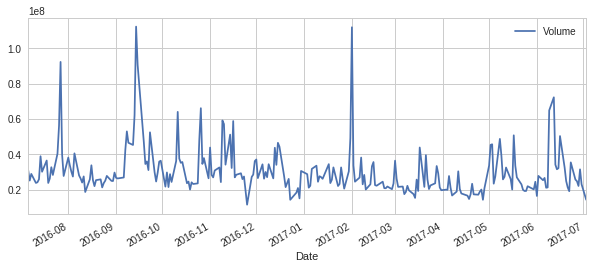

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
ma_list = [10,20,50]

for ma in ma_list:
    column_name = "MA FOR %s DAYS" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'],ma)

/home/kashyap_sri/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/home/kashyap_sri/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/home/kashyap_sri/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


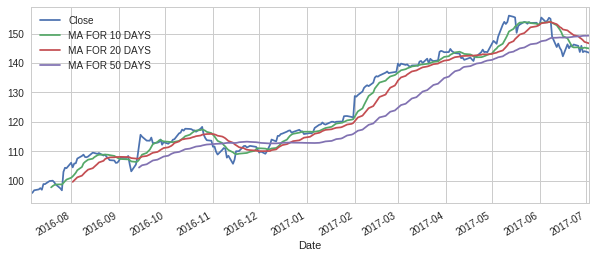

In [13]:
AAPL[['Close','MA FOR 10 DAYS','MA FOR 20 DAYS','MA FOR 50 DAYS']].plot(subplots=False,legend=True,figsize=(10,4))

In [14]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

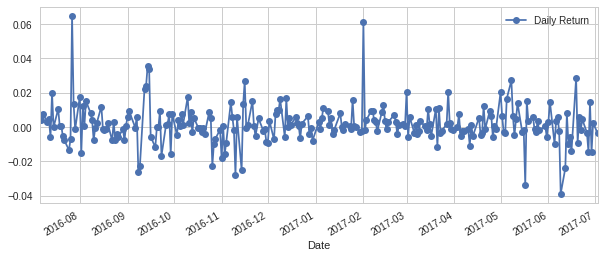

In [15]:
AAPL['Daily Return'].plot(figsize = (10,4),legend = True,marker = 'o')

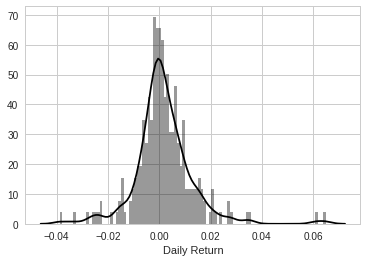

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color = 'black')

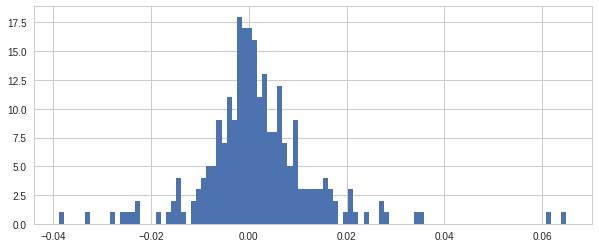

In [17]:
AAPL['Daily Return'].hist(bins = 100,figsize = (10,4))

In [18]:
closing_df = pdr.DataReader(tech_list,'google',start,end)['Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-07-06,95.53,737.61,697.77,51.38
2016-07-07,95.94,736.57,695.36,51.38
2016-07-08,96.68,745.81,705.63,52.30
2016-07-11,96.98,753.78,715.09,52.59
2016-07-12,97.42,748.21,720.64,53.21


In [20]:
returns = closing_df.pct_change()

In [21]:
returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-07-06,NaN,NaN,NaN,NaN
2016-07-07,0.004292,-0.001410,-0.003454,0.000000
2016-07-08,0.007713,0.012545,0.014769,0.017906
2016-07-11,0.003103,0.010686,0.013406,0.005545
2016-07-12,0.004537,-0.007389,0.007761,0.011789


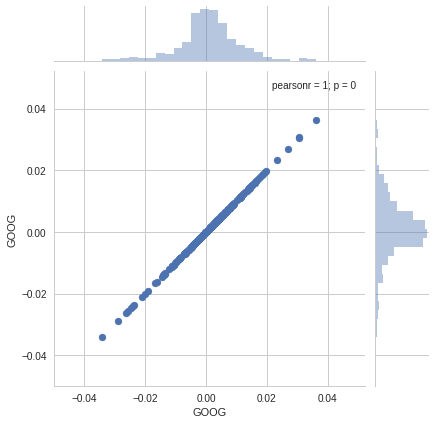

In [22]:
#to check if the stocks are correlated
sns.jointplot('GOOG','GOOG',data = returns)

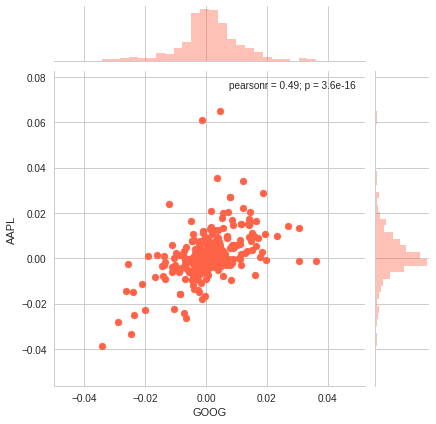

In [23]:
#Google and Apple
sns.jointplot('GOOG','AAPL',data = returns,color='tomato')

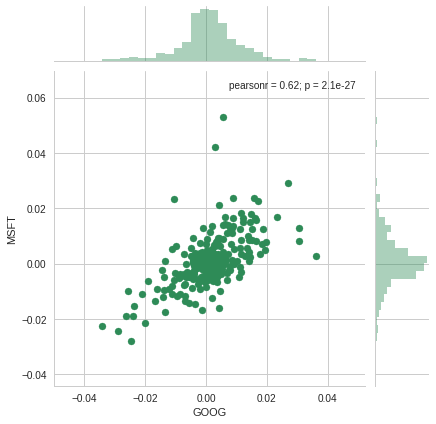

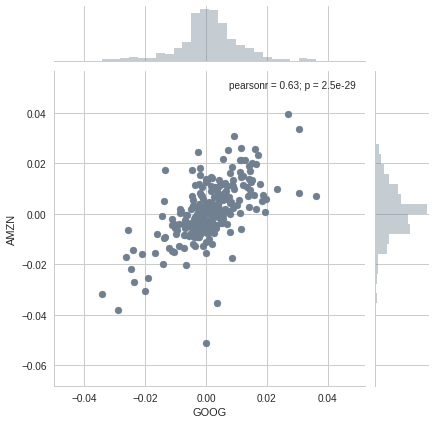

In [25]:
#for google and microsoft and google and amazon respectively
sns.jointplot('GOOG','MSFT',data = returns,color='seagreen')
sns.jointplot('GOOG','AMZN',data = returns,color='slategrey')

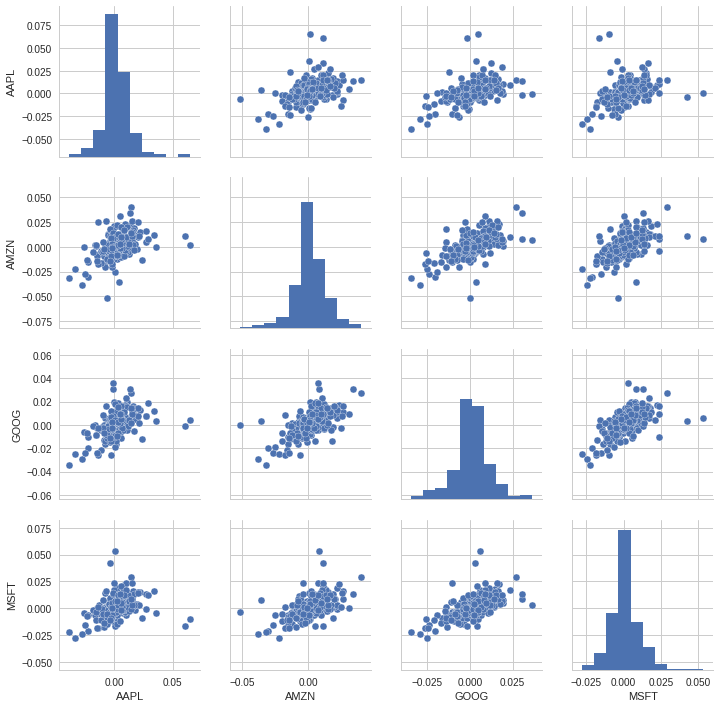

In [27]:
sns.pairplot(returns.dropna())

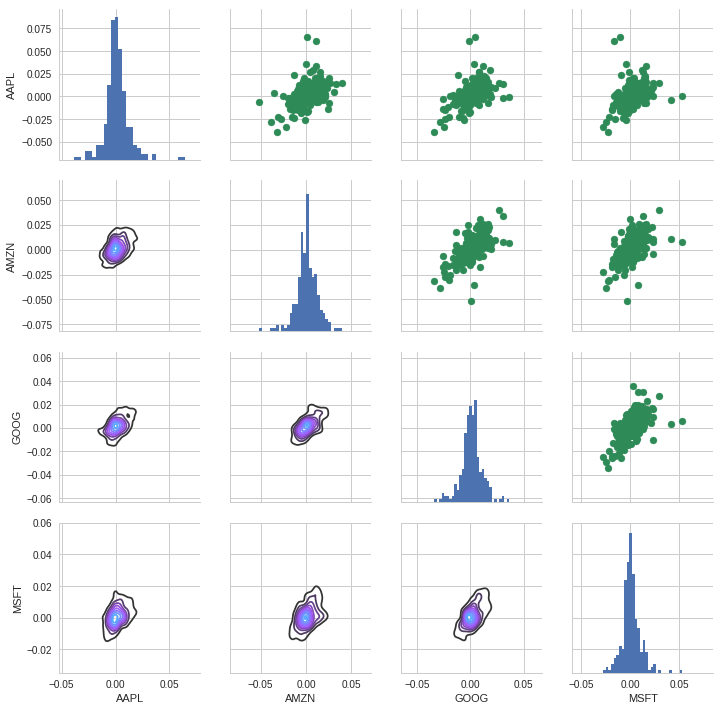

In [31]:
fig = sns.PairGrid(returns.dropna())
fig.map_upper(plt.scatter,color='seagreen')
fig.map_lower(sns.kdeplot,cmap='cool_d')
fig.map_diag(plt.hist,bins = 30)

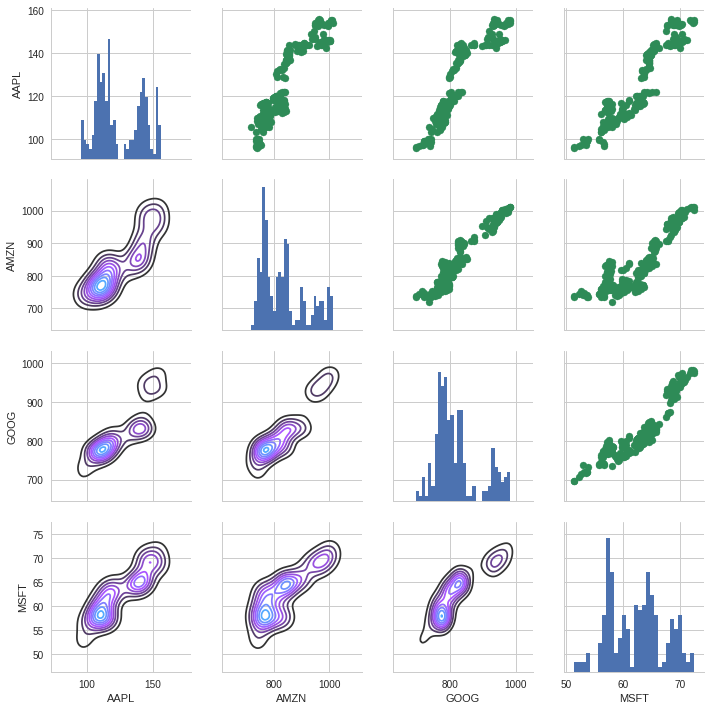

In [32]:
fig = sns.PairGrid(closing_df.dropna())
fig.map_upper(plt.scatter,color='seagreen')
fig.map_lower(sns.kdeplot,cmap='cool_d')
fig.map_diag(plt.hist,bins = 30)

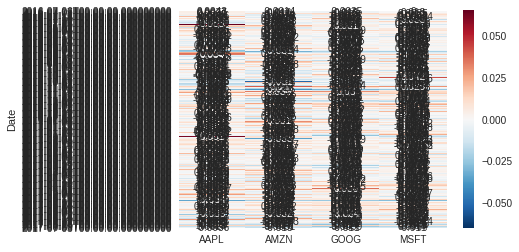

In [37]:
sns.heatmap(returns,annot=True)

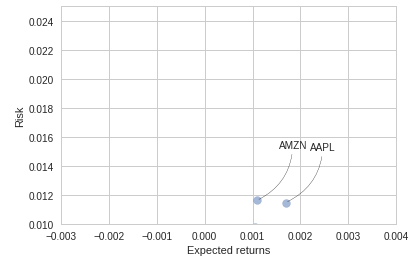

In [39]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


In [40]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-07-07,0.004292,-0.001410,-0.003454,0.000000
2016-07-08,0.007713,0.012545,0.014769,0.017906
2016-07-11,0.003103,0.010686,0.013406,0.005545
2016-07-12,0.004537,-0.007389,0.007761,0.011789
2016-07-13,-0.005646,-0.007458,-0.005079,0.005638
